## TrieNode Class and Method

In [1]:
#Code revamped from https://towardsdatascience.com/implementing-a-trie-data-structure-in-python-in-less-than-100-lines-of-code-a877ea23c1a1
#to support storing strings at a node where a word can be formed from the root to the node

from typing import Tuple

class TrieNode(object):
    """
    Our trie node implementation. Very basic. but does the job
    """
    
    def __init__(self, char: str, fullWord = None):
        self.char = char
        self.children = []
        # Is it the last character of the word.`
        self.word_finished = False
        #The full word we want to replace any abbreviations should it be found
        self.fullWord = fullWord
    
    
def add(root, word, fullWord):
    """
    Adding a word in the trie structure
    """
    node = root
    for char in word:
        found_in_child = False
        # Search for the character in the children of the present `node`
        for child in node.children:
            if child.char == char:

                # And point the node to the child that contains this char
                node = child
                found_in_child = True
                break
        # We did not find it so add a new chlid
        if not found_in_child:
            new_node = TrieNode(char)
            node.children.append(new_node)
            # And then point node to the new child
            node = new_node
    # Everything finished. Mark it as the end of a word.
    node.word_finished = True
    node.fullWord = fullWord #Store the fullword at the child node.
    
    
def search(root, word):
    '''
    Checks if the word is contained within the Trie
    '''
    node = root
    if not root.children: #If node has no children, then there cant be the word
        return False, 0   
    
    for char in word:
        char_not_found = True
        
        for child in node.children: #Search every child for the next char in abbreviation
            if child.char == char:
                char_not_found = False
                
                node = child #If found, set next node to child and break loop to now search new node for the next letter in abbreviation
                break
                
        if char_not_found: #If we cannot find the character, the word does not exist in the Trie so we return False
            return False,0
        
    if not node.fullWord: #If the node.fullWord is none, our word is a prefix of an actual abbreviation found in the Trie but we do not want that
        return False,0
    return True, node.fullWord #If we reach here, every letter has been found thus we return the word stored at that node.
    

## Building the Trie

In [2]:
import pandas as pd
df = pd.read_csv("projectData/slang.csv", sep=',')
df.head()

,Unnamed: 0,acronym,expansion
0,0,2day,today
1,1,2m2h,too much too handle
2,2,2moro,tomorrow
3,3,2nite,tonight
4,4,4eae,for ever and ever


In [3]:
#Adding every abbreviation found in the slang dataset to the Trie
trieRoot = TrieNode('*')
for i in range(len(df['acronym'])):
    add(trieRoot,df['acronym'][i],df['expansion'][i])

In [4]:
#Testing that we can find all of 
for i in range(15):
    print(search(trieRoot,df['acronym'][i]))

(True, 'today')
(True, 'too much too handle')
(True, 'tomorrow')
(True, 'tonight')
(True, 'for ever and ever')
(True, 'always and forever')
(True, 'at any rate')
(True, 'as always your friend')
(True, 'already been done')
(True, 'acknowledge')
(True, 'another day in hell')
(True, 'any day now')
(True, 'all due respect')
(True, 'as early as possible')
(True, 'as far as i am concerned')


In [5]:
print(search(trieRoot,"ayo"))

(False, 0)


### Method used to pass sentences through Trie

In [6]:
#This is the method used for our text replacement algorithim that uses our pre-built Trie.
def replace_Words(trie, sentence):
    wordList = sentence.split(" ") #splits string into a list seperated by spaces
    
    for i in range(len(wordList)): #For each word in the sentence, search for it in our Trie
        returnValue = search(trie,wordList[i])
        
        if returnValue[0]: #If abbreviation is found in Trie, replace abbreviation with its full word.
            wordList[i] = returnValue[1]
            
    output = ' '.join(str(item) for item in wordList) #Groups the list of word back into a single string
    return output

In [7]:
#Testing the Method
test = "I love you 4eae"
replace_Words(trieRoot,test)

'I love you for ever and ever'

## Loading Data

In [8]:
rockstar = pd.read_csv("projectData/com.rockstargames.gtasa.csv",low_memory=False)
rockstar['content']

0        Why the game actually just drive to right and ...
1        Ha suck. Beacuse current game no play always h...
2        Always nostalgic, I was wondering if devs put ...
3                                                Nice game
4        Everything you need in a mobile game. Tons of ...
                               ...                        
84686    Doesn't work on Nexus 4 CM11 M1 at the moment ...
84687    I love that Rockstar is making all these amazi...
84688    I've been waiting for this game for a while an...
84689    'download failed because you may not have purc...
84690                                Weeeeeeeeee fiiiiirst
Name: content, Length: 84691, dtype: object

In [9]:
squareenix = pd.read_csv("projectData/com.squareenixmontreal.hitmansniperandroid.csv",low_memory=False)
squareenix['content']

0         Very bad no updates nothing is new same map ma...
1         In this game the missions are kinda hard to pl...
2                Idk why but the the sound is stuttering...
3                                                Cool, man.
4                                                     super
                                ...                        
100436    Error while downloading please fix the bug or ...
100437                                      Great job guys!
100438                   Best game on app store hands down.
100439        Error when downloading despite space on phone
100440    Definitely worth $5 I had no doubts since I wa...
Name: content, Length: 100441, dtype: object

In [10]:
theRoom1 = pd.read_csv("projectData/com.FireproofStudios.TheRoom.csv",low_memory=False)
theRoom1['content']

0        Awesome game! I played Da Vinci's House 1 & 2 ...
1        I truly enjoyed this game! I love puzzle games...
2                                              Great game.
3                     ❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️
4        A brilliant game, all the clues are there but ...
                               ...                        
51383    Great puzzles, a little on the short side but ...
51384    While the graphics are amazing and take some t...
51385                    Worth every penny an amazing game
51386                    Great game, finally on Android :)
51387     Only just started really but completely smitten.
Name: content, Length: 51388, dtype: object

In [11]:
theRoom2 = pd.read_csv("projectData/com.FireproofStudios.TheRoom2.csv",low_memory=False)
theRoom2['content']

0        Highly recommended! I'm addicted to this serie...
1        Brilliant, kept me enthralled. Brain stimulati...
2        Fun and challenging. Lots of cool visuals and ...
3        Still a great game. However it does at some po...
4                                                Fun stuff
                               ...                        
46141    The graphics are unlike any other mobile game!...
46142    You guys definitely have a excellent future ah...
46143    Best Game... I hope I get to play this with my...
46144                                 Absolutely stunning!
46145    Your games are awesome and we'll worth the wai...
Name: content, Length: 46146, dtype: object

## Graphing Performance

In [12]:
import matplotlib.pyplot as plt
import time
dfList = [rockstar['content'],squareenix['content'],theRoom1['content'],theRoom2['content']]

In [13]:
ts = []
#Loops through every dataframe and string the dataframes and passes them through the text replacement method.
#It then appends a time to ts each time a string is passed through.
def process_data():
    start = time.time()
    for df in dfList:
        for j in range(len(df)):
            sentence = str(df[j])
            replace_Words(trieRoot,sentence)
            end = time.time()
            ts.append(end - start)
            

Text(0.5, 1.0, 'Trie Complexity')

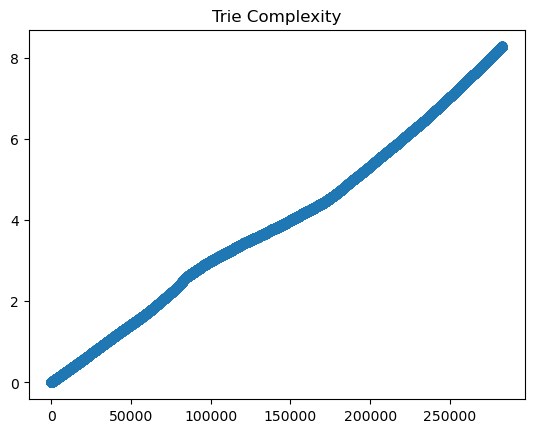

In [14]:
#Using the process_data function we can now plot our time complexity
process_data()
x = range(1,len(ts)+1)
plt.scatter(x,ts)
plt.title("Trie Complexity")

#### Hashtable Graph for Reference

![](images/HashtableGraph.PNG)